# LC-MS pilot @FGCZ 

Analysis of the LC-MS pilot on Microvinification samples run by FGCZ in march 2024.

In [2]:
import pandas as pd
import os

# Visualizations 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib.sankey import Sankey

%matplotlib inline

In [3]:
#!pip install openpyxl
#!pip install matplotlib-venn

## Load raw data

In [4]:
# set the directory 
os.chdir('/Users/lfloerl/Desktop/MICROTERROIR/Metabolomics/LC-MS/FGCZ pilot')

In [5]:
# load table 
df_neg_all = pd.read_excel('p32837_o33656_neg_features_ALL.xlsx')
df_pos_all = pd.read_excel('p32837_o33656_pos_features_ALL.xlsx')

df_pos_MS2 = pd.read_excel('p32837_o33656_pos_features_MS2.xlsx')
df_neg_MS2 = pd.read_excel('p32837_o33656_neg_features_MS2.xlsx')


In [6]:
print("All positive mode", df_pos_all.shape)
print("All negative mode", df_neg_all.shape)

All positive mode (5024, 86)
All negative mode (3579, 81)


## Venn Diagram of overlapping IDs 

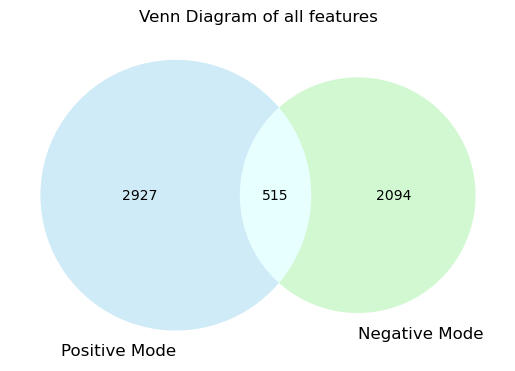

In [7]:
# Extracting sets of names
IDs_pos = set(df_pos_all['Name'])
IDs_neg = set(df_neg_all['Name'])

# Creating the Venn diagram
venn2(subsets=[IDs_pos, IDs_neg], set_labels=('Positive Mode', 'Negative Mode'),
      set_colors=('skyblue', 'lightgreen'))

# Display the plot
plt.title('Venn Diagram of all features')
plt.show()

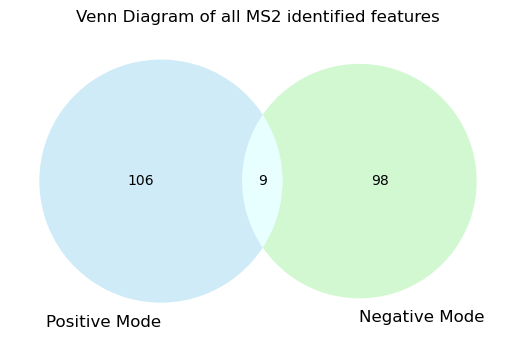

In [8]:
# Extracting sets of names
IDs_pos_MS2 = set(df_pos_MS2['Name'])
IDs_neg_MS2 = set(df_neg_MS2['Name'])

# Creating the Venn diagram
venn2(subsets=[IDs_pos_MS2, IDs_neg_MS2], set_labels=('Positive Mode', 'Negative Mode'),
      set_colors=('skyblue', 'lightgreen'))

# Display the plot
plt.title('Venn Diagram of all MS2 identified features')
plt.show()